# Final Project
## Gonzalo Martinez Medina

Oak-Ridge-National-Laboratory-ORNL-Rotating-Shadowband-Radiometer-RSR-Analysis
1. Identify changes of measured factors across time. What has changed? When? How do season affect the factors, and which factor show no impact.
2. Assess impact of radiation as a link to climate research and climate change.
3. Determine possible solar power output as an alternative based on the data collected.
4. Determine correlation between variables. Analyze high/low correlations and impact.
5. Eliminate possible outliers from dataset.

In [25]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import metpy.plots as mpplots
import seaborn as sns


In [26]:
# Data download can be done: https://drive.google.com/drive/folders/1pQK7fA5RbQu3xF0XiIua30coFAGFY3mX?usp=sharing
# Load the data files tp panda

file_2008 = pd.read_csv("2008_csv.csv")
file_2009 = pd.read_csv("2009_csv.csv")
file_2010 = pd.read_csv("2010_csv.csv")
file_2011 = pd.read_csv("2011_csv.csv")
file_2012 = pd.read_csv("2012_csv.csv")
file_2013 = pd.read_csv("2013_csv.csv")
file_2014 = pd.read_csv("2014_csv.csv")
file_2015 = pd.read_csv("2015_csv.csv")
file_2016 = pd.read_csv("2016_csv.csv")
file_2017 = pd.read_csv("2017_csv.csv")
file_2018 = pd.read_csv("2018_csv.csv")


In [27]:
# Join data bases
final_file=pd.concat([file_2008,file_2009,file_2010,file_2011,file_2012,file_2013,file_2014,file_2015,file_2016,file_2017,file_2018])
final_file.shape

(96421, 13)

Now we take a look at the data types

In [28]:
final_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96421 entries, 0 to 8758
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DATE (MM/DD/YYYY)                    96421 non-null  object 
 1   HOUR-EST                             96421 non-null  int64  
 2   Avg Global Horizontal [W/m^2]        96421 non-null  float64
 3   Avg Direct Normal [W/m^2]            96421 non-null  float64
 4   Avg Diffuse Horizontal [W/m^2]       96421 non-null  float64
 5   Avg Direct (Bird estimated) [W/m^2]  96421 non-null  float64
 6   Avg Air Temperature [deg C]          96421 non-null  float64
 7   Avg Rel Humidity [%]                 96421 non-null  float64
 8   Avg Avg Wind Speed @ 42ft [m/s]      96421 non-null  float64
 9   Avg Est Pressure [mBar]              96421 non-null  float64
 10  Avg Precipitation [mm]               96421 non-null  float64
 11  Avg CR800 Temp [deg C]       

We will look at the first 10 data rows as an example of our data

In [29]:
print('The data set looks like:')
final_file.head(10)

The data set looks like:


,DATE (MM/DD/YYYY),HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
0,1/1/2008,1,0.3342,0.0000,0.3342,0.0000,5.1477,81.7912,0.9980,1037.4333,0.0,2.6802,12.8600
1,1/1/2008,2,0.0745,0.0000,0.0745,0.0000,9.4980,67.5277,2.4877,1021.2500,0.0,6.5099,12.8528
2,1/1/2008,3,0.0011,0.0000,0.0011,0.0000,9.0335,57.2088,3.3520,1023.0833,0.0,8.1107,12.8500
3,1/1/2008,4,0.0248,0.0000,0.0248,0.0000,7.0070,39.1225,2.7082,1030.4000,0.0,7.0610,12.8425
4,1/1/2008,5,0.1632,0.0000,0.1632,0.0000,5.1809,45.6943,2.3489,1037.0333,0.0,5.1631,12.8232
5,1/1/2008,6,0.2902,0.0000,0.2902,0.0000,4.1170,52.0505,2.2516,1041.1833,0.0,3.7843,12.8042
6,1/1/2008,7,0.4957,0.0000,0.4957,0.0000,3.1835,56.4483,2.2983,1044.6500,0.0,2.8144,12.7852
7,1/1/2008,8,1.8618,0.0000,1.8618,63.9983,2.2580,59.7230,1.5852,1048.2167,0.0,1.8069,12.7637
8,1/1/2008,9,86.0246,380.6361,27.9096,469.2617,2.4748,60.8423,2.3751,1047.4167,0.0,1.2906,13.5438
9,1/1/2008,10,312.0933,717.9335,119.8969,738.8317,3.6684,55.6740,2.3860,1042.8500,0.0,2.4597,14.7152


We identify the 13 columns and will proceed to check for statistics information and overall correlation prior to visualization

In [30]:
print('The main statistic of the data set are listed below:')
final_file.describe()

The main statistic of the data set are listed below:


,HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
count,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000,96421.000000
mean,11.501312,164.315223,151.424567,70.880460,400.394375,15.332713,76.251242,0.886992,1001.865185,0.002270,16.018539,13.216989
std,6.921527,247.610712,270.028944,107.631756,416.279323,10.041264,18.690284,0.785162,35.232427,0.015745,11.367144,0.653231
min,0.000000,-0.006500,-0.929500,-0.006500,0.000000,-19.504000,16.137000,0.200000,916.600000,0.000000,-20.140800,12.386200
25%,6.000000,0.000200,0.000000,0.000200,0.000000,7.603100,62.658300,0.233400,975.716700,0.000000,7.445500,12.718200
50%,12.000000,5.807600,0.000000,5.693600,180.325000,16.383800,81.333800,0.606500,997.000000,0.000000,16.504500,12.830800
75%,18.000000,274.041600,182.462300,108.132700,873.200000,22.703000,92.920000,1.330300,1028.200000,0.000000,23.442000,13.834000
max,23.000000,1045.275700,1002.269400,1000.843700,1004.466700,41.762300,99.480000,7.833300,1138.150000,0.715400,48.751000,15.251200


In [31]:
print('and the correlation table is:')
final_file.corr()

and the correlation table is:


,HOUR-EST,Avg Global Horizontal [W/m^2],Avg Direct Normal [W/m^2],Avg Diffuse Horizontal [W/m^2],Avg Direct (Bird estimated) [W/m^2],Avg Air Temperature [deg C],Avg Rel Humidity [%],Avg Avg Wind Speed @ 42ft [m/s],Avg Est Pressure [mBar],Avg Precipitation [mm],Avg CR800 Temp [deg C],Avg RSR Battery [VDC]
HOUR-EST,1.000000,0.153319,0.130795,0.148710,0.226102,0.209029,-0.361113,0.169273,-0.206218,0.002802,0.270119,0.238331
Avg Global Horizontal [W/m^2],0.153319,1.000000,0.850849,0.730782,0.790673,0.463493,-0.636939,0.465670,-0.451143,-0.076213,0.491308,0.795225
Avg Direct Normal [W/m^2],0.130795,0.850849,1.000000,0.347274,0.640104,0.314225,-0.634415,0.383495,-0.305040,-0.077899,0.340748,0.720083
Avg Diffuse Horizontal [W/m^2],0.148710,0.730782,0.347274,1.000000,0.760911,0.421732,-0.420093,0.403133,-0.411926,-0.055425,0.438009,0.710281
Avg Direct (Bird estimated) [W/m^2],0.226102,0.790673,0.640104,0.760911,1.000000,0.396787,-0.549101,0.497721,-0.389106,0.004904,0.421446,0.833477
Avg Air Temperature [deg C],0.209029,0.463493,0.314225,0.421732,0.396787,1.000000,-0.223705,0.092458,-0.999205,0.009711,0.987579,0.273316
Avg Rel Humidity [%],-0.361113,-0.636939,-0.634415,-0.420093,-0.549101,-0.223705,1.000000,-0.522384,0.212218,0.130945,-0.300761,-0.642805
Avg Avg Wind Speed @ 42ft [m/s],0.169273,0.465670,0.383495,0.403133,0.497721,0.092458,-0.522384,1.000000,-0.088590,0.043115,0.131342,0.497798
Avg Est Pressure [mBar],-0.206218,-0.451143,-0.305040,-0.411926,-0.389106,-0.999205,0.212218,-0.088590,1.000000,-0.012673,-0.984652,-0.267256
Avg Precipitation [mm],0.002802,-0.076213,-0.077899,-0.055425,0.004904,0.009711,0.130945,0.043115,-0.012673,1.000000,0.009674,-0.081274


Now that we have the correlation table, we can plot what might be some important data.

<AxesSubplot:xlabel='Avg Global Horizontal [W/m^2]', ylabel='Avg Direct Normal [W/m^2]'>

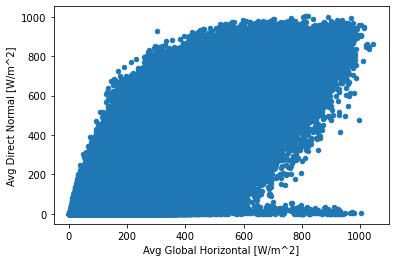

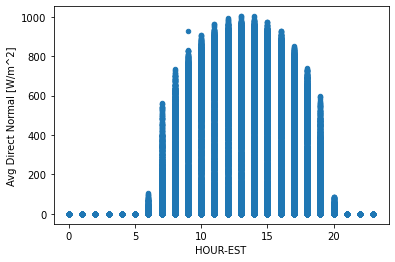

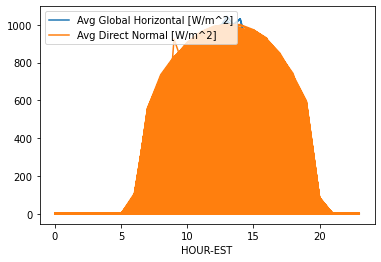

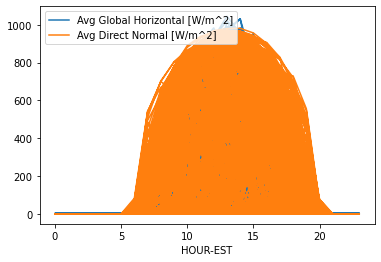

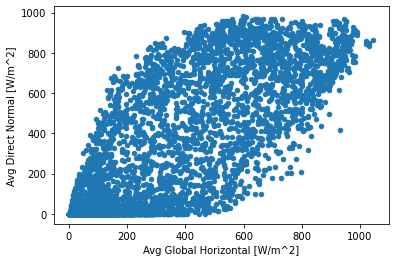

In [32]:
final_file.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg Direct Normal [W/m^2]')
final_file.plot.scatter(x='HOUR-EST', y='Avg Direct Normal [W/m^2]')
final_file.plot(x='HOUR-EST', y=['Avg Global Horizontal [W/m^2]','Avg Direct Normal [W/m^2]'])
file_2008.plot(x='HOUR-EST', y=['Avg Global Horizontal [W/m^2]','Avg Direct Normal [W/m^2]'])
file_2008.plot.scatter(x='Avg Global Horizontal [W/m^2]', y='Avg Direct Normal [W/m^2]')

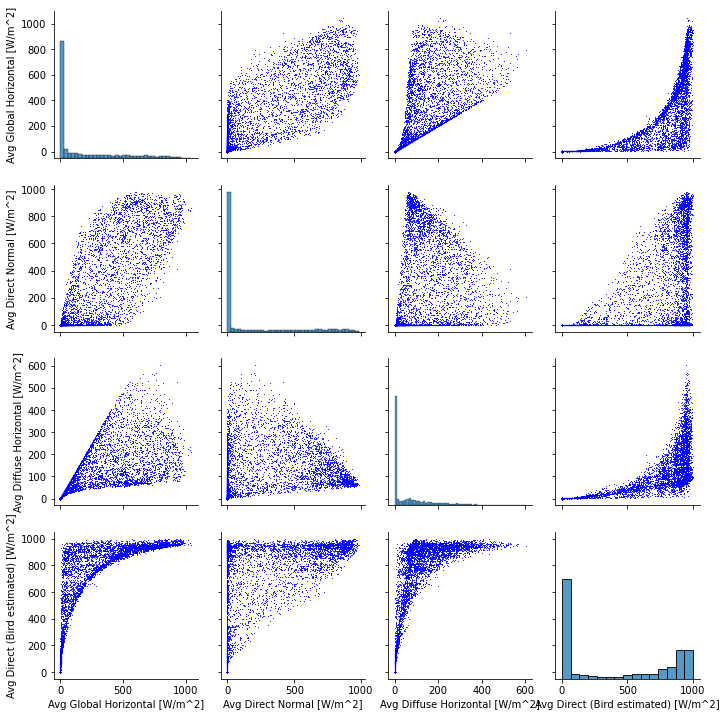

In [34]:
# Additional plots of main correlations from data
sns.pairplot(
    file_2008[['Avg Global Horizontal [W/m^2]', 'Avg Direct Normal [W/m^2]','Avg Diffuse Horizontal [W/m^2]','Avg Direct (Bird estimated) [W/m^2]']],
    diag_kind='hist', palette='bright',
    plot_kws={'facecolor': 'b', 'edgecolor': 'b', 's': 1}
)

plt.tight_layout()